Training Data Size : 60000 
 Testing Data Size : 10000


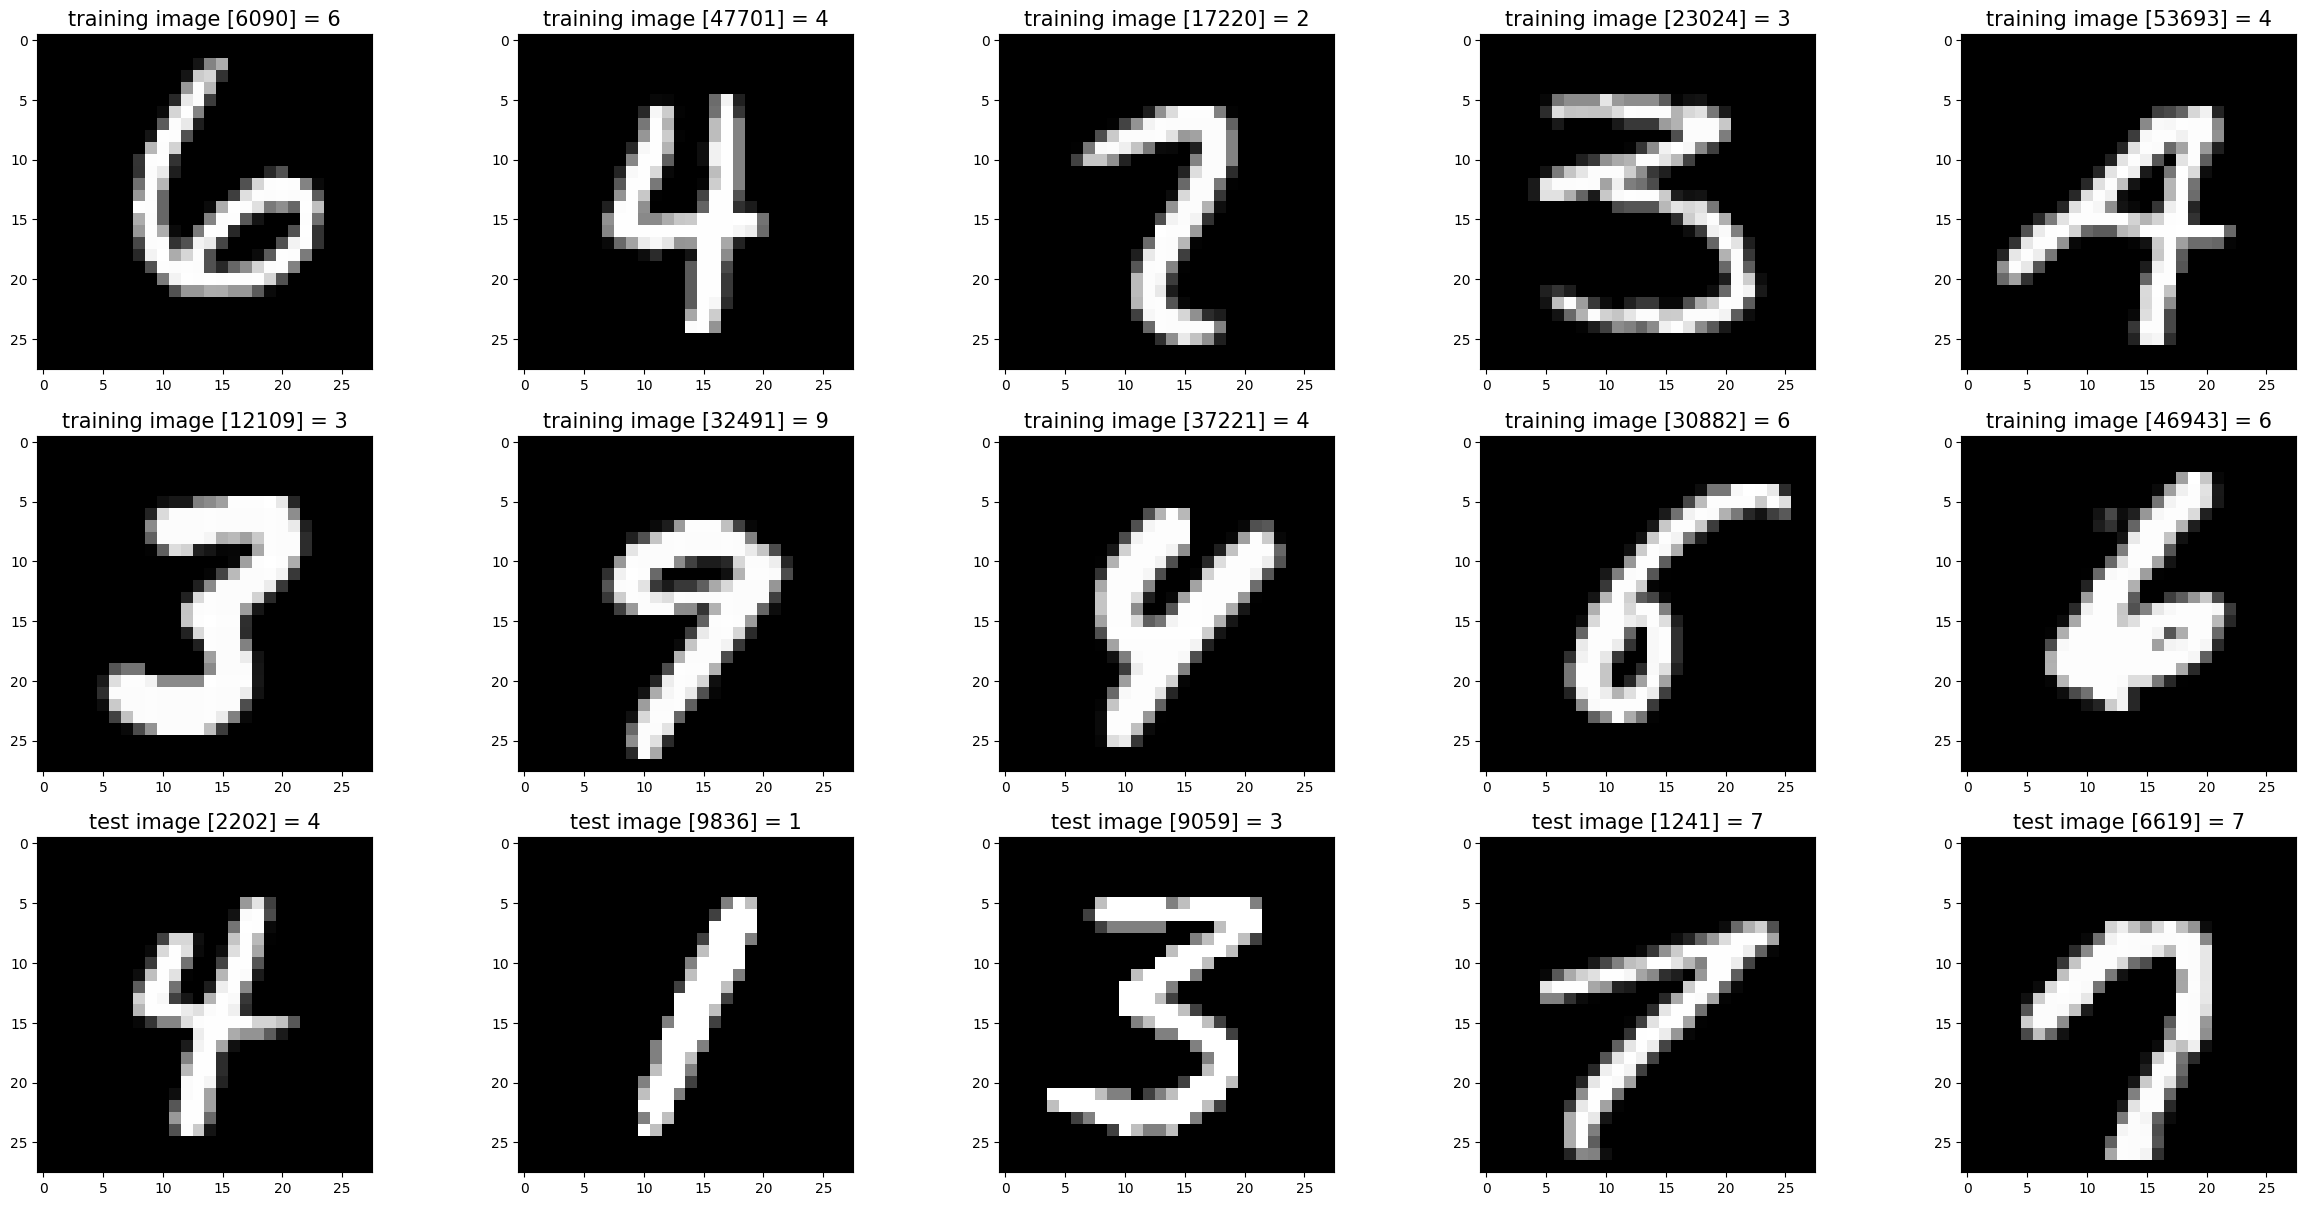

In [2]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test) 

training_images_filepath = 'train-images-idx3-ubyte/train-images-idx3-ubyte'
training_labels_filepath = 'train-labels-idx1-ubyte/train-labels-idx1-ubyte'
test_images_filepath = 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte'
test_labels_filepath = 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte'

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()
print("Training Data Size :",len(x_train),"\n Testing Data Size :",len(x_test))
#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

<class 'list'>


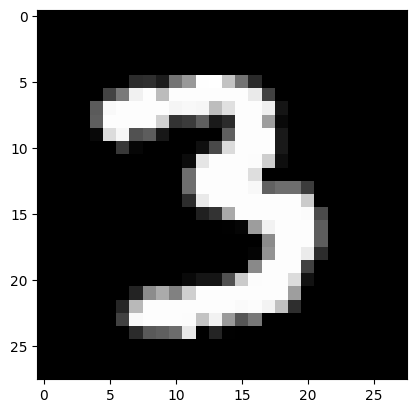

In [3]:
print(type(x_test[500]))
plt.imshow(x_test[500],cmap=plt.cm.gray)

In [10]:
print(type(x_test))

<class 'list'>


In [4]:
y_test[500]

3

In [11]:
#Transform Image into 1D np array

for i in range(len(x_train)):
    arr = np.array(x_train[i])
    x_train[i] = arr.ravel()

for i in range(len(x_test)):
    arr = np.array(x_test[i])
    x_test[i] = arr.ravel()

In [15]:
x_test[500].shape

(784,)

In [16]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(500, 500), verbose=True)

In [17]:
mlp.fit(x_train, y_train)

Iteration 1, loss = 1.70381931
Iteration 2, loss = 0.30311284
Iteration 3, loss = 0.17403987
Iteration 4, loss = 0.13175839
Iteration 5, loss = 0.10465381
Iteration 6, loss = 0.11860396
Iteration 7, loss = 0.11822061
Iteration 8, loss = 0.10069697
Iteration 9, loss = 0.10781929
Iteration 10, loss = 0.07288721
Iteration 11, loss = 0.07835923
Iteration 12, loss = 0.08573767
Iteration 13, loss = 0.08321641
Iteration 14, loss = 0.07014469
Iteration 15, loss = 0.06883877
Iteration 16, loss = 0.05257320
Iteration 17, loss = 0.04576998
Iteration 18, loss = 0.05216717
Iteration 19, loss = 0.06725496
Iteration 20, loss = 0.06131194
Iteration 21, loss = 0.07519585
Iteration 22, loss = 0.05129984
Iteration 23, loss = 0.06061206
Iteration 24, loss = 0.04843718
Iteration 25, loss = 0.05563913
Iteration 26, loss = 0.06255494
Iteration 27, loss = 0.05233683
Iteration 28, loss = 0.04158105
Iteration 29, loss = 0.04606555
Iteration 30, loss = 0.03930014
Iteration 31, loss = 0.05371651
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(500, 500), verbose=True)

In [18]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (500, 500),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}

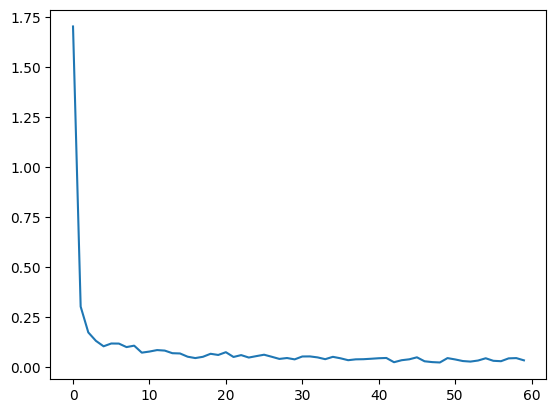

In [19]:
plt.plot(mlp.loss_curve_)

In [ ]:
y_test[200]

In [20]:
y_pred = mlp.predict(x_test)

In [ ]:
y_pred[200]

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred, average="weighted"))
print("Recall", recall_score(y_test, y_pred, average="weighted"))
print("F1", f1_score(y_test, y_pred, average="weighted"))

Accuracy 0.9744
Precision 0.9747231957719811
Recall 0.9744
F1 0.974427934921115
